<h2> Analisis preliminar para detectar la calidad de los datos del DataFrame Review-California</h2>

<h3>Importación de las librerias</h3>

In [11]:
import os
import pandas as pd
import re 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [12]:
datos_california = r'C:\Users\EFRAIN LINARES\Desktop\Proyecto Final\CSV\California.csv'


In [13]:
df_cali = pd.read_csv(datos_california)


In [14]:
df_cali

,user_id,name,time,rating,text,gmap_id
0,108991152262655788985,Song Ro,1609909927056,5,Love there korean rice cake.,0x80c2c778e3b73d33:0xbdc58662a4a97d49
1,111290322219796215751,Rafa Robles,1612849648663,5,Good very good,0x80c2c778e3b73d33:0xbdc58662a4a97d49
2,112640357449611959087,David Han,1583643882296,4,They make Korean traditional food very properly.,0x80c2c778e3b73d33:0xbdc58662a4a97d49
3,117440349723823658676,Anthony Kim,1551938216355,5,Short ribs are very delicious.,0x80c2c778e3b73d33:0xbdc58662a4a97d49
4,100580770836123539210,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,0x80c2c778e3b73d33:0xbdc58662a4a97d49
...,...,...,...,...,...,...
2699995,111342337087018931578,Byunguk Kim,1573362674409,5,NaN,0x80c2bea30829f279:0x39aa953ee93734ed
2699996,108081820251273699976,Ceveda Craytonhooks,1580608853411,5,Beautiful salon. The staff and atmosphere were...,0x8094675073616747:0x9f935a9b9046a9ba
2699997,117591383135333249676,Natacha Thompson,1528597806165,5,Flo is a great beautician. She is very patie...,0x8094675073616747:0x9f935a9b9046a9ba
2699998,112426610655792883265,Eleanor Aikins,1551203379295,5,I Been going to have a variety of hair style a...,0x8094675073616747:0x9f935a9b9046a9ba


user_id          0
name             7
time             0
rating           0
text       1170997
gmap_id          0
dtype: int64


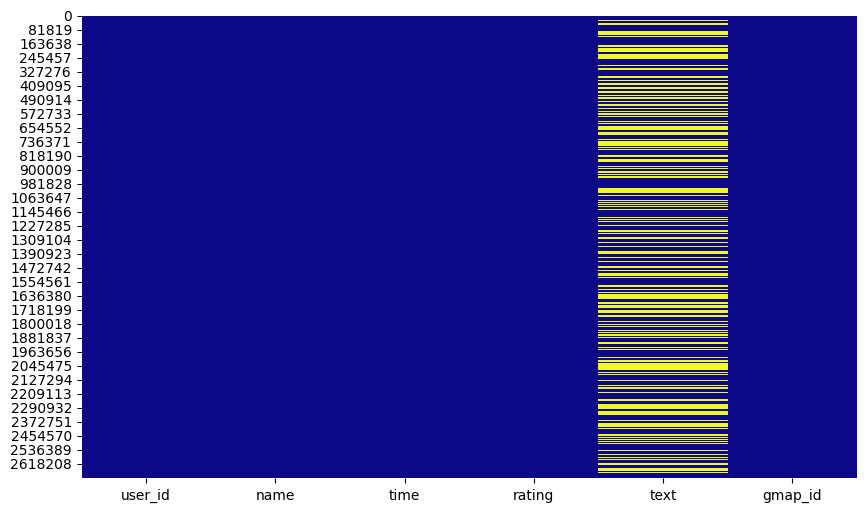

In [22]:
# Verificar valores nulos en todas las columnas
null_counts = df_cali.isnull().sum()
print(null_counts)

# Visualización grafica de valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(df_cali.isnull(), cbar=False, cmap='plasma')
plt.show()

Las columnas user_id, name, time, rating y gmap_id no representan valores nulos entre sus datos. Lo cual es beneficioso para futuros analisis de estas columnas y no se tendran inconvenientes de valores faltantes y en eliminarlos, en los cuales entre estas columnas la unica que representa estos valores es la columna text, aunque hay valores faltantes, parece que la mayoría de las filas tienen un comentario asociado, lo cual es bueno para el análisis de sentimientos o la generación de insights de clientes.

<h3>Hacemos una transformacion en la columna time y verificamos datos duplicados</h3>

In [25]:
# Convertir la columna 'time' a formato de fecha
df_cali['time'] = pd.to_datetime(df_cali['time'], unit='ms')

# Mostrar la cantidad de duplicados antes de eliminarlos
duplicados = df_cali.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados}")


df_cali.drop_duplicates(inplace=True)

Cantidad de filas duplicadas: 75243


In [ ]:
#verificamos el tipo de datos por columna
df_cali.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2624757 entries, 0 to 2699999
Data columns (total 6 columns):
 #   Column   Dtype         
---  ------   -----         
 0   user_id  object        
 1   name     object        
 2   time     datetime64[ns]
 3   rating   int64         
 4   text     object        
 5   gmap_id  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 140.2+ MB


<h3>Analisis de valores nulos de los datos</h3>

In [23]:
valores_nulos = df_cali.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos)

print(f"El DataFrame California tiene {df_cali.shape[0]} filas.")

porcentaje_nulos = (df_cali.isnull().sum() / len(df_cali))* 100
print(f'Porcentaje de valores nulos en la columna {porcentaje_nulos} ')

Valores nulos por columna:
user_id          0
name             7
time             0
rating           0
text       1170997
gmap_id          0
dtype: int64
El DataFrame California tiene 2700000 filas.
Porcentaje de valores nulos en la columna user_id     0.000000
name        0.000259
time        0.000000
rating      0.000000
text       43.370259
gmap_id     0.000000
dtype: float64 


In [18]:
filas_datos_nulos = df_cali.dropna()
filas_datos_nulos

,user_id,name,time,rating,text,gmap_id
0,108991152262655788985,Song Ro,1609909927056,5,Love there korean rice cake.,0x80c2c778e3b73d33:0xbdc58662a4a97d49
1,111290322219796215751,Rafa Robles,1612849648663,5,Good very good,0x80c2c778e3b73d33:0xbdc58662a4a97d49
2,112640357449611959087,David Han,1583643882296,4,They make Korean traditional food very properly.,0x80c2c778e3b73d33:0xbdc58662a4a97d49
3,117440349723823658676,Anthony Kim,1551938216355,5,Short ribs are very delicious.,0x80c2c778e3b73d33:0xbdc58662a4a97d49
4,100580770836123539210,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,0x80c2c778e3b73d33:0xbdc58662a4a97d49
...,...,...,...,...,...,...
2699989,107865872361562200686,Damasceno Damasceno,1558245616930,5,(Translated by Google) Excellence in humanized...,0x80c2bea30829f279:0x39aa953ee93734ed
2699996,108081820251273699976,Ceveda Craytonhooks,1580608853411,5,Beautiful salon. The staff and atmosphere were...,0x8094675073616747:0x9f935a9b9046a9ba
2699997,117591383135333249676,Natacha Thompson,1528597806165,5,Flo is a great beautician. She is very patie...,0x8094675073616747:0x9f935a9b9046a9ba
2699998,112426610655792883265,Eleanor Aikins,1551203379295,5,I Been going to have a variety of hair style a...,0x8094675073616747:0x9f935a9b9046a9ba


<b>Se observa que el Dataset cuenta con columnas duplicadas que tienen una inmensa cantidad de datos faltantes, que representan el 0.01% de los datos, por lo que resultan irrelevantes. Los datos existentes en esas columnas resultan ser de la misma organización, responden a un error de redacción que probablemente sea el que motive la creación de esas columnas adicionales. Por estas implicancias, se recomienda su eliminación, lo que reducirá significativamente la cantidad de valores faltantes.</b>

In [19]:
filas_datos_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1529001 entries, 0 to 2699999
Data columns (total 6 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1529001 non-null  object
 1   name     1529001 non-null  object
 2   time     1529001 non-null  int64 
 3   rating   1529001 non-null  int64 
 4   text     1529001 non-null  object
 5   gmap_id  1529001 non-null  object
dtypes: int64(2), object(4)
memory usage: 81.7+ MB


In [27]:
df_cali.head()

,user_id,name,time,rating,text,gmap_id
0,108991152262655788985,Song Ro,2021-01-06 05:12:07.056,5,Love there korean rice cake.,0x80c2c778e3b73d33:0xbdc58662a4a97d49
1,111290322219796215751,Rafa Robles,2021-02-09 05:47:28.663,5,Good very good,0x80c2c778e3b73d33:0xbdc58662a4a97d49
2,112640357449611959087,David Han,2020-03-08 05:04:42.296,4,They make Korean traditional food very properly.,0x80c2c778e3b73d33:0xbdc58662a4a97d49
3,117440349723823658676,Anthony Kim,2019-03-07 05:56:56.355,5,Short ribs are very delicious.,0x80c2c778e3b73d33:0xbdc58662a4a97d49
4,100580770836123539210,Mario Marzouk,2017-05-16 05:01:41.933,5,Great food and prices the portions are large,0x80c2c778e3b73d33:0xbdc58662a4a97d49


<h3>Buscamos outliers en la columna "Time" y los eliminamos para analizar correctamente los datos</h3>

In [28]:
# Asegurarse de que la columna 'time' esté en formato datetime
df_cali['time'] = pd.to_datetime(df_cali['time'], errors='coerce')

# Verificar si hay valores nulos después de convertir a datetime (indican errores de conversión)
nulos_time = df_cali['time'].isnull().sum()
print(f"Valores nulos en 'time' después de la conversión a datetime: {nulos_time}")

# Si hay valores nulos en 'time', se pueden mostrar o eliminar
if nulos_time > 0:
    print("\nFilas con valores nulos en 'time':")
    print(df_cali[df_cali['time'].isnull()])

# Detectar outliers en 'time' (fechas fuera de un rango razonable)
# Establecemos un rango razonable, por ejemplo desde 2000 hasta el presente
min_date = pd.to_datetime('2007-06-01')
max_date = pd.to_datetime('today')

# Filtrar las filas que tienen fechas fuera de este rango
outliers_time = df_cali[(df_cali['time'] < min_date) | (df_cali['time'] > max_date)]

print(f"\nCantidad de outliers en 'time' fuera del rango {min_date} a {max_date}: {len(outliers_time)}")

# Mostrar las filas que tienen fechas como outliers
if len(outliers_time) > 0:
    print("\nOutliers detectados en 'time':")
    print(outliers_time[['time']])

# Verificar cantidad de columnas con outliers
print(f"\nAntes de limpiar los outliers, el DataFrame tiene {len(df_cali)} filas.")

# Eliminamos estos outliers
df_cali = df_cali[(df_cali['time'] >= min_date) & (df_cali['time'] <= max_date)]

# Confirmar que no queden outliers en la columna 'time'
print(f"\nDespués de limpiar los outliers, el DataFrame tiene {len(df_cali)} filas.")

Valores nulos en 'time' después de la conversión a datetime: 0

Cantidad de outliers en 'time' fuera del rango 2007-06-01 00:00:00 a 2025-02-10 08:47:32.766446: 183

Outliers detectados en 'time':
              time
2279    2005-03-03
39049   2005-03-14
42814   2006-01-01
56521   2006-03-20
63019   2007-04-10
...            ...
2610072 2007-03-21
2610073 2005-03-12
2655127 2007-04-03
2655134 2005-03-27
2655225 2006-04-16

[183 rows x 1 columns]

Antes de limpiar los outliers, el DataFrame tiene 2624757 filas.

Después de limpiar los outliers, el DataFrame tiene 2624574 filas.


<h3>Buscamos datos erroneos en rating y verificamos que sus valores estarian entre 1 y 5 de tipo enteros</h3>

In [29]:
# Identificar valores únicos en 'rating'
print(df_cali['rating'].unique())

# Verificar si hay valores fuera del rango esperado
combined_df = df_cali[(df_cali['rating'] >= 1) & (df_cali['rating'] <= 5)]

[5 4 1 2 3]


<h2>Analizaremos visualmente los datos y buscaremos relaciones entre ellos</h2>

<h3>Visualización grafica de la calidad y fecha de las reseñas</h3>

C:\Users\EFRAIN LINARES\AppData\Local\Temp\ipykernel_10812\3259136145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cali.loc[:, 'text_length'] = df_cali['text'].apply(lambda x: len(str(x)))


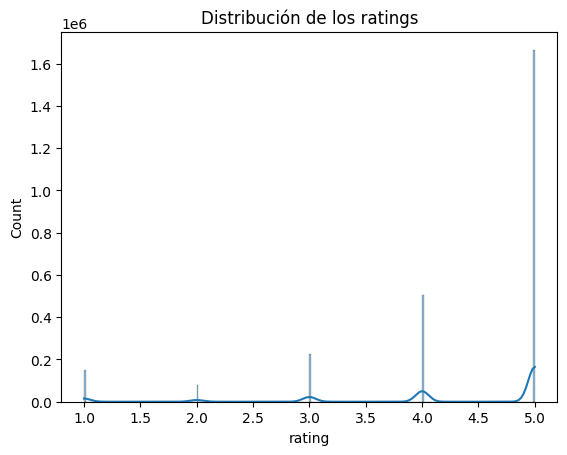

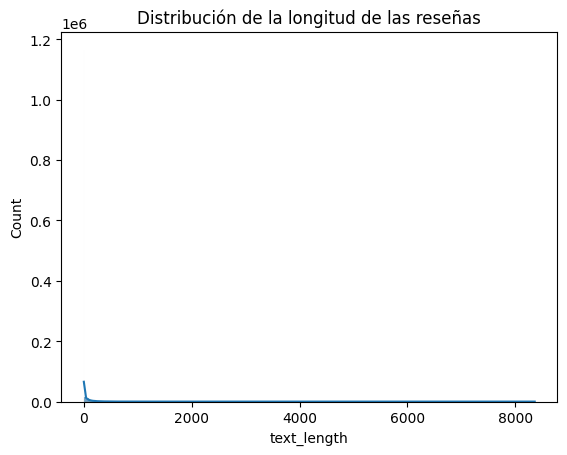

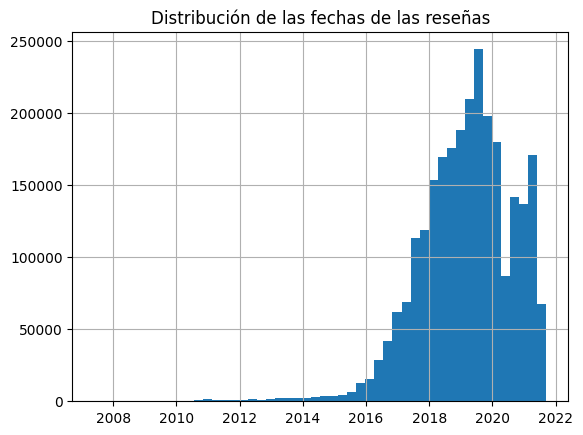

In [30]:
# Longitud de las reseñas
df_cali.loc[:, 'text_length'] = df_cali['text'].apply(lambda x: len(str(x)))

# Distribución de los ratings
sns.histplot(df_cali['rating'], kde=True)
plt.title('Distribución de los ratings')
plt.show()

# Longitud de las reseñas
sns.histplot(df_cali['text_length'], kde=True)
plt.title('Distribución de la longitud de las reseñas')
plt.show()

# Análisis de fechas
df_cali['time'].hist(bins=50)
plt.title('Distribución de las fechas de las reseñas')
plt.show()

<h3>Para analizar la columna text con las reseñas, normalizamos la columna text y hacemos la columna cleaned_text</h3>

In [31]:
# Función para limpiar el texto
def clean_text(text):
    text = re.sub(r'\n', ' ', text)  # Eliminar saltos de línea
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar caracteres especiales
    return text.lower()  # Convertir todo a minúsculas

# Aplicar la función solo si el texto no es nulo utilizando .loc para evitar el warning
df_cali.loc[:, 'cleaned_text'] = df_cali['text'].apply(lambda x: clean_text(x) if pd.notnull(x) else x)

# Ver las primeras filas después de la limpieza
df_cali[['text', 'cleaned_text']].head()

C:\Users\EFRAIN LINARES\AppData\Local\Temp\ipykernel_10812\2365809955.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cali.loc[:, 'cleaned_text'] = df_cali['text'].apply(lambda x: clean_text(x) if pd.notnull(x) else x)


,text,cleaned_text
0,Love there korean rice cake.,love there korean rice cake
1,Good very good,good very good
2,They make Korean traditional food very properly.,they make korean traditional food very properly
3,Short ribs are very delicious.,short ribs are very delicious
4,Great food and prices the portions are large,great food and prices the portions are large


<h3>Nube de palabras para la visualización de las palabras mas utilizadas en las reseñas</h3>

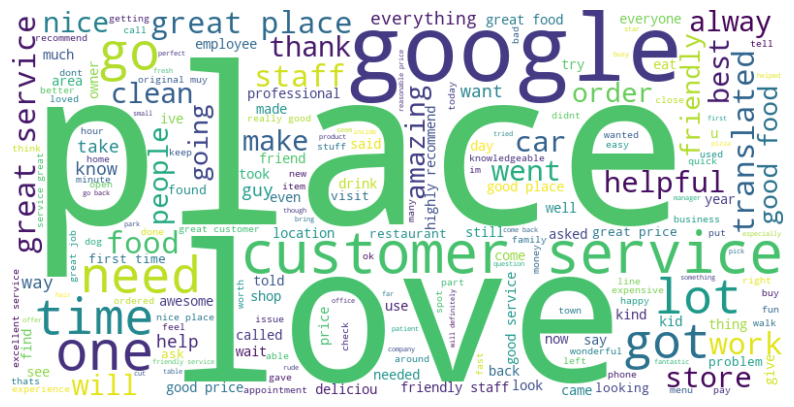

In [32]:
# Unir todos los textos en una sola cadena
all_text = ' '.join(df_cali['cleaned_text'].dropna())

# Generar una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<h3>Nube de palabras para la visualización de las reseñas con los ratings mas altos (5) y mas bajos (1) para comparar sus diferencias </h3>

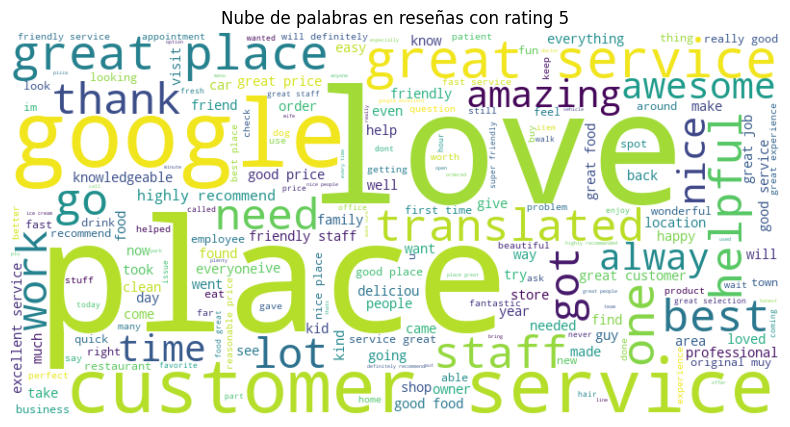

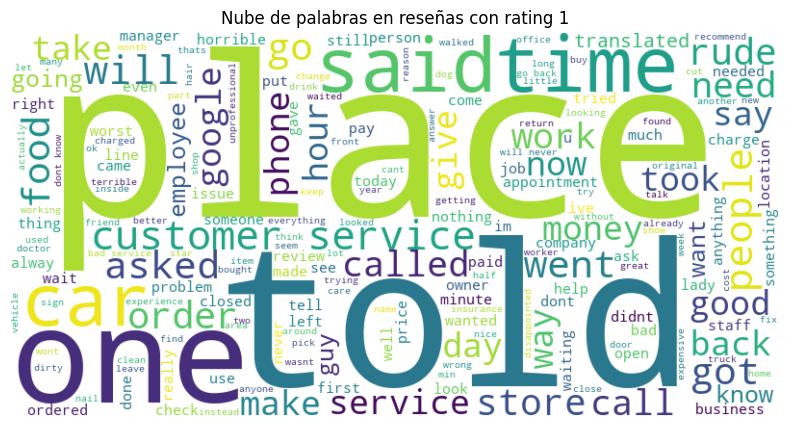

In [33]:
# Filtrar las reseñas positivas (rating = 5) y negativas (rating = 1)
positive_reviews = ' '.join(df_cali[df_cali['rating'] == 5]['cleaned_text'].dropna())
negative_reviews = ' '.join(df_cali[df_cali['rating'] == 1]['cleaned_text'].dropna())

# Crear una nube de palabras para las reseñas positivas
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras en reseñas con rating 5')
plt.show()

# Crear una nube de palabras para las reseñas negativas
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras en reseñas con rating 1')
plt.show()

C:\Users\EFRAIN LINARES\AppData\Local\Temp\ipykernel_10812\3156217345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cali['text_length'] = df_cali['text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)


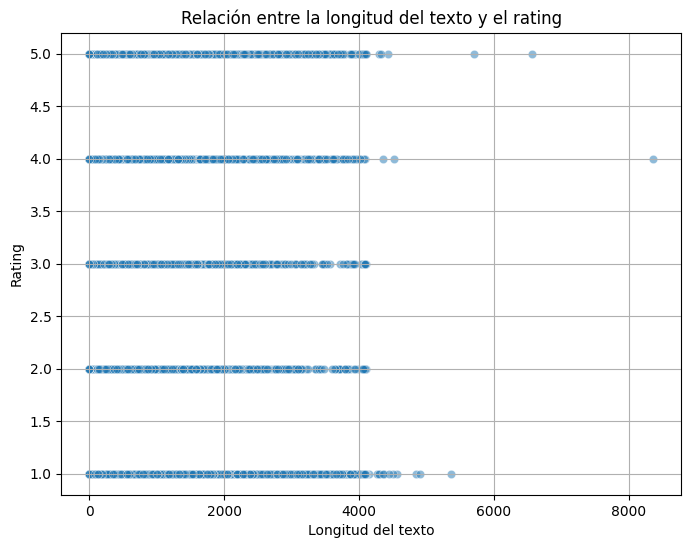

In [34]:
# Crear una nueva columna que almacena la longitud del texto en 'text'
df_cali['text_length'] = df_cali['text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Gráfico de dispersión entre 'rating' y 'text_length'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='text_length', y='rating', data=df_cali, alpha=0.5)

# Ajustar título y etiquetas
plt.title('Relación entre la longitud del texto y el rating')
plt.xlabel('Longitud del texto')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

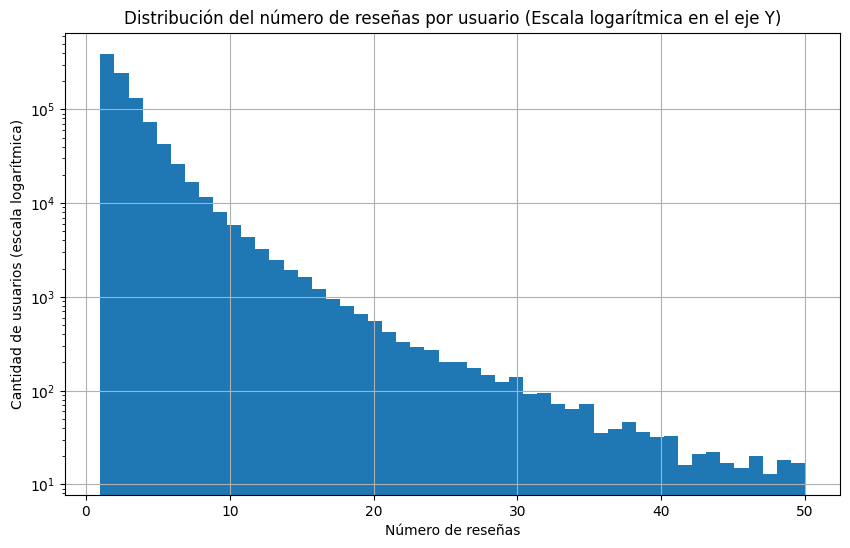

In [35]:
# Contar cuántas reseñas ha hecho cada usuario
user_review_counts = df_cali['user_id'].value_counts()

# Ajustar el gráfico con límites y escala logarítmica
plt.figure(figsize=(10, 6))

# Histograma con el número de reseñas por usuario, limitando el rango en el eje X
user_review_counts.hist(bins=50, range=(1, 50))

# Aplicar escala logarítmica al eje Y
plt.yscale('log')

# Títulos y etiquetas
plt.title('Distribución del número de reseñas por usuario (Escala logarítmica en el eje Y)')
plt.xlabel('Número de reseñas')
plt.ylabel('Cantidad de usuarios (escala logarítmica)')

# Mostrar el gráfico
plt.show()

C:\Users\EFRAIN LINARES\AppData\Local\Temp\ipykernel_10812\895198944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cali['hour'] = df_cali['time'].dt.hour


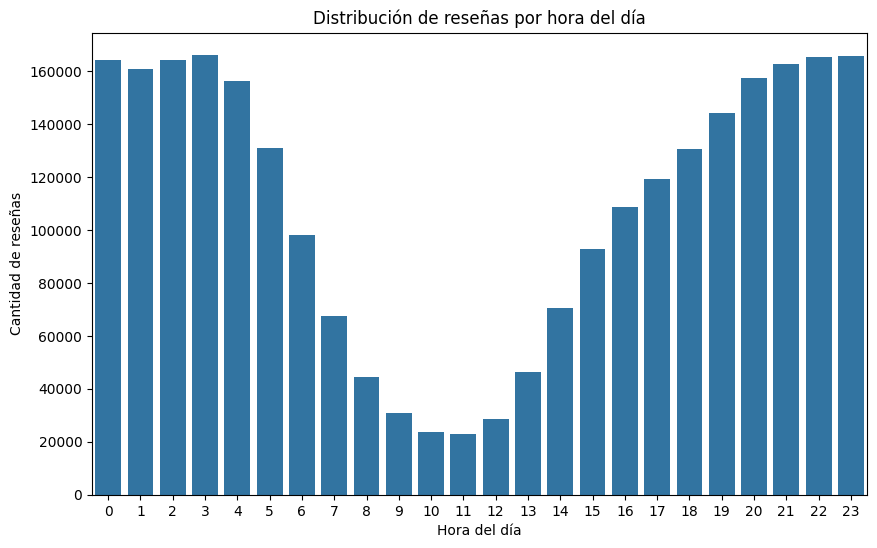

In [39]:
# Extraer la hora del día de la columna 'time'
df_cali['hour'] = df_cali['time'].dt.hour
# Graficar la distribución de reseñas por hora
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df_cali)

# Añadir etiquetas y título
plt.title('Distribución de reseñas por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de reseñas')

# Mostrar el gráfico
plt.show()